In [1]:
from random import randint
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []


# The story line

# . An experimental drug was tested amongst a population of 2100 individuals between 13-100 years of age. 
#   Half of the population is 65 years old and above (i.e >= 65 years)
# .  The other half comprises of individuals 13 years old and above but not up to 65 years of age (i.e >= 13 and < 65).
# . 95% of the patients 65 or older showed side effects
# . Around 95% of patients under 65 showed no side effects







In [3]:
for i in range(50):
   
    # Around 5% of patients under 65 who showed side effects
    
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

     # Around 5% of patients above 65 who showed no side effects

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    

for i in range(1000):
   
    # Around 95% of patients under 65 who showed no side effects
    
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

     # Around 95% of patients above 65 who showed side effects

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)    

In [4]:
# for i in train_labels:
#     print(i)
train_labels.__len__()

2100

In [5]:
dir(train_labels)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [6]:
train_labels.__len__()

2100

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
type(train_samples)

numpy.ndarray

In [9]:
train_labels

array([1, 0, 0, ..., 1, 1, 1])

In [36]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

# dir(train_samples)
# help(train_samples.reshape(-1, 1))
# train_samples.reshape(-1, 1)

scaled_train_samples

array([[0.62068966],
       [0.22988506],
       [0.50574713],
       ...,
       [0.95402299],
       [0.8045977 ],
       [0.91954023]])

In [11]:
for i in scaled_train_samples:
    print(i)

[0.62068966]
[0.22988506]
[0.50574713]
[0.72413793]
[0.68965517]
[0.05747126]
[0.36781609]
[0.74712644]
[0.67816092]
[0.55172414]
[0.7816092]
[0.]
[0.35632184]
[0.51724138]
[0.49425287]
[0.57471264]
[0.93103448]
[0.98850575]
[0.42528736]
[0.6091954]
[0.85057471]
[0.37931034]
[0.45977011]
[0.35632184]
[0.95402299]
[0.59770115]
[0.51724138]
[1.]
[0.6091954]
[0.14942529]
[0.06896552]
[0.13793103]
[0.95402299]
[0.34482759]
[0.65517241]
[0.87356322]
[0.91954023]
[0.37931034]
[0.32183908]
[0.65517241]
[0.67816092]
[0.14942529]
[0.59770115]
[0.47126437]
[0.62068966]
[0.98850575]
[0.98850575]
[0.97701149]
[1.]
[0.7816092]
[0.31034483]
[0.55172414]
[0.94252874]
[0.29885057]
[0.11494253]
[0.63218391]
[0.47126437]
[0.09195402]
[0.89655172]
[0.24137931]
[0.74712644]
[0.17241379]
[0.55172414]
[0.68965517]
[0.49425287]
[0.12643678]
[0.35632184]
[0.09195402]
[0.8045977]
[0.74712644]
[0.74712644]
[0.81609195]
[0.88505747]
[0.95402299]
[0.44827586]
[0.95402299]
[0.74712644]
[0.93103448]
[0.63218391]
[0

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [13]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split = 0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.6462 - accuracy: 0.5439 - val_loss: 0.6608 - val_accuracy: 0.4952 - 2s/epoch - 9ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6257 - accuracy: 0.6048 - val_loss: 0.6426 - val_accuracy: 0.5905 - 588ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6005 - accuracy: 0.6698 - val_loss: 0.6191 - val_accuracy: 0.6333 - 517ms/epoch - 3ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5719 - accuracy: 0.7222 - val_loss: 0.5900 - val_accuracy: 0.6857 - 468ms/epoch - 2ms/step
Epoch 5/30
189/189 - 1s - loss: 0.5418 - accuracy: 0.7672 - val_loss: 0.5627 - val_accuracy: 0.7238 - 544ms/epoch - 3ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5098 - accuracy: 0.8021 - val_loss: 0.5278 - val_accuracy: 0.7714 - 447ms/epoch - 2ms/step
Epoch 7/30
189/189 - 1s - loss: 0.4755 - accuracy: 0.8307 - val_loss: 0.4949 - val_accuracy: 0.7810 - 505ms/epoch - 3ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4443 - accuracy: 0.8450 - val_loss: 0.4616 - val_accuracy: 0.8429 - 479ms/epoch - 3ms/step
Epo

In [17]:
test_labels = []
test_samples = []

for i in range(10):
   
    # Around 5% of patients under 65 who showed side effects
    
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

     # Around 5% of patients above 65 who showed no side effects

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    

for i in range(200):
   
    # Around 95% of patients under 65 who showed no side effects
    
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

     # Around 95% of patients above 65 who showed side effects

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)  

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

# dir(train_samples)
# help(train_samples.reshape(-1, 1))
# train_samples.reshape(-1, 1)

# scaled_test_samples
test_samples


array([ 85,  49,  94,  75,  67,  66,  15,  57,  89,  91,  52,  77,  83,
       100,  19,  66,  27,  60,  69,  80,  64,  20,  27,  65,  72,  13,
        52,  87,  98,  77,  30,  23,  13,  89,  54,  73,  47,  20,  67,
        26,  24,  29,  75,  92,  68,  83,  54,  59,  91,  13,  96,  35,
        96,  77,  95,  26,  41,  63,  13,  71,  42,  31,  20,  54,  16,
        30,  41,  51,  95,  51,  67,  54,  25,  66,  57,  57,  45,  99,
       100,  60,  71,  79,  87,  67,  56,  66,  79,  61,  18,  71,  73,
        73,  93,  22,  38,  91,  79,  99,  35,  86,  36,  78,  35,  19,
        57,  29,  24,  96,  67,  42,  43,  65,  17,  41,  86,  74,  13,
        61,  18,  89,  25,  42,  28,  39,  93,  79,  25,  58,  71,  69,
        16,  81,  94,  33,  39,  87,  69,  18,  26,  79,  27,  61,  29,
        85,  18,  57,  14,  51,  72,  71,  63,  58,  85,  19,  68,  74,
        67,  68,  68,  78,  96,  49,  17,  37,  80,  93,  88,  59,  89,
        96,  50,  96,  67,  69,  35,  69,  59,  96,  95,  28,  4

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size =10, verbose = 0)

In [21]:
for i in predictions:
    print(i)

[0.04548141 0.95451856]
[0.87740505 0.12259497]
[0.02320859 0.9767914 ]
[0.14298843 0.85701156]
[0.34657183 0.65342814]
[0.37999377 0.62000626]
[0.9679291  0.03207085]
[0.6924371 0.3075629]
[0.03379156 0.9662084 ]
[0.02909107 0.970909  ]
[0.822646   0.17735393]
[0.11107337 0.8889267 ]
[0.05343258 0.9465674 ]
[0.01472102 0.98527896]
[0.96819335 0.03180667]
[0.37999377 0.62000626]
[0.96871537 0.03128461]
[0.59335065 0.40664938]
[0.2842902  0.71570975]
[0.07549738 0.9245027 ]
[0.4500574  0.54994255]
[0.96825904 0.03174095]
[0.96871537 0.03128461]
[0.41459388 0.5854061 ]
[0.20473112 0.79526895]
[0.9677962  0.03220373]
[0.822646   0.17735393]
[0.03922086 0.96077913]
[0.0171406  0.98285943]
[0.11107337 0.8889267 ]
[0.968909   0.03109098]
[0.96845543 0.0315446 ]
[0.9677962  0.03220373]
[0.03379156 0.9662084 ]
[0.7764752  0.22352473]
[0.18219425 0.8178057 ]
[0.9052714  0.09472858]
[0.96825904 0.03174095]
[0.34657183 0.65342814]
[0.9686506  0.03134941]
[0.96852064 0.0314794 ]
[0.9688446 0.03115

In [22]:
rounded_predicitions = np.argmax(predictions, axis = 1)

In [23]:
for i in rounded_predicitions:
    print(i)

1
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
0
1
1
1
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
0
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
1
1
0
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
1
1


In [24]:
for i in test_labels:
    print(i)

0
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
0
1
1
1
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
1
0
1
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
0
0
0
0
0
1
1
1
0
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
1
1


In [25]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
def plot_confusion_matrix(cm, classes, normalize=False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # This function prints and plots the  confusion matrix.
    # Normalization can be applied by setting normalize = True

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
            

Confusion matrix, without normalization
[[194  16]
 [  9 201]]


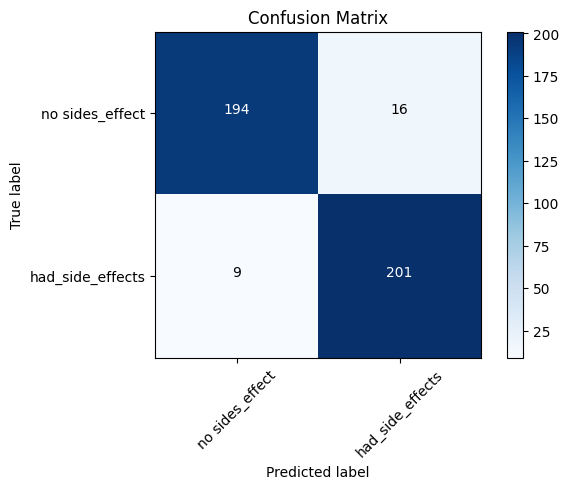

In [35]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predicitions)
cm_plot_labels = ['no sides_effect', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title= 'Confusion Matrix')